# Newton's Method vs Gradient Descent 

In this code, I'll be applying Gradient Descent on Logistic Regression and then comparing the result to the one we get after applying Second Order Optimization technique called Newton's Method on a particular Dataset.

###### Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pylab as plt1
import matplotlib.pyplot as plt2
import numpy as np
import time

###### Loading the data 

Dataset that we are using here contains 100 values of Distance cycled and the respective Calories lost. 

In [2]:
df = pd.read_csv("CalorieData.csv")
df.head()

,dist_cycled,calories
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
arr = df.as_matrix()
arr.shape

(100, 2)

Function for computing total squared error

In [4]:
def total_error(b, m, points):
    tError = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        tError += (y - (m*x +b))**2
    return tError/float(len(points)) #returning total mean squared error

Now, defining the main gradient Descent function:

In [5]:
def gradient_step(cm, cb, points, lr):
    dt_db = 0
    dt_dm = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        t = y - (cm*x + cb)
        dt_dm += -1*x*t
        dt_db += -1*t
        
    dt_dm = (2*dt_dm)/float(len(points))
    dt_db = (2*dt_db)/float(len(points))
    
    m = cm - (lr * dt_dm)
    b = cb - (lr * dt_db)
    
    return [m, b]


In [6]:
def gd(points, sm, sb, lr, num, early_stop_num=0, modify_lr = False):
    m = sm #initial slope
    b = sb #initial intercept
    error = []
    modify_lr_after_step = 3
    stop_num = 0
    er_decrease = 0
    
    for i in range(num):
        m,b = gradient_step(m, b, points, lr)
        err = round(total_error(b, m, points), 2) # computing mean square error and rounding to 2 decimal place
        
        if i>=1 and error[len(error)-1] == er and early_stop_num != 0:
            stop_num += 1
            
            if stop_num == early_stop_num:
                print("Executing early stopping")
                break
        else:
            stop_num = 0
                
        if modify_lr and err < total_error(b,m,points):
            er_decrease += 1
            if er_decrease % modify_lr_after_step == 0:
                print("Increasing lr for faster descent")
                lr += 0.00002
        else:
            er_decrease = 0
            lr = 0.00021
        error.append(err)
        
        print("Finished with learning rate {}".format(lr))
        return [m,b,error]
        

###### Plotting graphs to visualize the data and best fit 

In [7]:
def plot_line_data(points, m, b):
    x = points[:,0]
    y = points[:,1]
    plt1.plot(x, y, 'bo')
    plt1.plot(x, m*x + b)
    plt1.axis([0,1.5* max(x), 0, 1.3 * max(y)]) #Set the axes range.
    plt1.title("Best line.")
    plt1.text(10, 130, "m="+str(round(m,4))+"  b="+str(round(b,4)))
    plt1.show() #shows the graph.
    return

def plot_error_data(error_value):
    num_iterations = range(len(error_value))
    print('min_error and max_errors are %.2f, %.2f'%(min(error_value), max(error_value)))
    plt1.plot(num_iterations, error_value) #plots iterations vs error_value
    #plt1.axis([0,1.5*max(num_iterations), min(error_value)-5, max(error_value) + 5])
    plt1.xlabel('iterations')
    plt1.ylabel('error_value')
    # plt1.text(10,130,'Min_Error value is :'+str(min(error_value))) #Shows min error value.
    plt1.show() #shows the plot.
    return

The main function:

Starting gradient descent at b = 1, m = 0, error = 5420.637733375842
Running...
Finished with learning rate 0.00021
After 1000 iterations b = 0.009986217818693379, m = 1.5016439250404972, error = 113.90649561266578


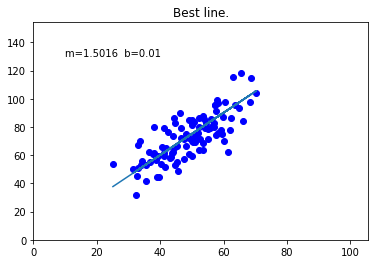

1.50164392504 0.00998621781869


In [8]:
learning_rate = 0.00021
init_m = 0
init_b = 1
iterations = 1000
points = arr
# print("So, The points are: ", points)
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(init_b, init_m, total_error(init_b, init_m, points)))
print("Running...")

[m, b, error] = gd(points, init_b, init_m, learning_rate, iterations, early_stop_num = 5, modify_lr = True)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(iterations, b, m, total_error(b, m, points)))
plot_line_data(points, m, b)
#plot_error_data(error)
print(m, b)

### Now, carrying out optimization through Newton's method 

Function for computing total mean squared error

In [9]:
def compute_total_error(m,b): #Computes total mean squared error
    totalError = 0
    # print("Points in compute_total_error are : ", points)
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError += (y - (m * x + b)) ** 2 #Error is calculated as y' = mx + b(Assuming linear regression) so E = (y-y')^2, summed over all points

    return totalError/float(len(points)) #Returning the mean squared error.

def total_error1(point_pair): #driver function for compute_total_error
    return compute_total_error(point_pair[0], point_pair[1])

Defining functions to calculate the jacobian and hessian matrices

In [10]:
def compute_jacobian(point_pair, h = 1e-5): #computes the jacobian of the function total_error
    n = len(point_pair)
    jacobian = np.zeros(n) #initialize the jacobian matrix
    for i in range(n):
        x_i = np.zeros(n)
        x_i[i] += h #add the limit value, any small value > 0 should do
        jacobian[i] = (total_error1(point_pair+x_i) - total_error1(point_pair))/h #calculate derivative using first principle method f'(x) = lt(h->0) (f(x+h) - f(x))/h
    return jacobian #return the jacobian for the pair of points

def compute_hessian(point_pair, h = 1e-5): #computes the hessian of the function total_error, it is found as the derivative of the jacobian
    n = len(point_pair)
    hessian = np.zeros((n,n)) #initialize the hessian matrix
    for i in range(n):
        x_i = np.zeros(n)
        x_i[i] += h #add the limit value, any small value > 0 should do
        hessian[i] = (compute_jacobian(point_pair+x_i) - compute_jacobian(point_pair))/h #calculate derivative using first principle method f'(x) = lt(h->0) (f(x+h) - f(x))/h

    return hessian #return the jacobian for the pair of points

Constructing the method used to carry out Newton's method i.e. Second Order Optimization

In [11]:
def compute_newton(init_points, max_iter = 10000, e = 1e-5): #calculate roots of the equation, i.e. find x if f(x) = 0. In our case we want to find the minima point, so we find f'(x) = 0
    point_pair_arr = np.zeros((max_iter, len(init_points))) #initalize m,b values
    print(point_pair_arr, point_pair_arr.shape)
    
    point_pair_arr[0] = init_points #start points
    print(point_pair_arr, point_pair_arr.shape)
    opt_val = None #optimal_value to return
    for i in range(max_iter):
        jacobian = compute_jacobian(point_pair_arr[i]) #calculate the jacobian at current m,b
        print("jacobian = ", jacobian)
        print()
        hessian = compute_hessian(point_pair_arr[i]) #calculate the hessian at current m,b
        print("hessian = ", hessian)
        print()
        point_pair_arr[i+1] = point_pair_arr[i] - np.dot(np.linalg.pinv(hessian), jacobian) #calulate the new m, new b using newton's equation x(t+1) = x(t) - f(x(t))/f'(x(t)) but we want to find root of f'(x) so we would do x(t+1) = x(t) - f'(x(t))/f''(x(t))
        #pinv is pseudo inverse, it prevents values like 1/0 and replaces it with a very high value.
        print('New m is %.2f and new b is %.2f'%(point_pair_arr[i,0], point_pair_arr[i,1]))
        opt_val = point_pair_arr[i+1]
        if np.abs(total_error1(point_pair_arr[i+1]) - total_error1(point_pair_arr[i])) < e: #used for early stopping, stops when there is no real improvement.
            print('Optimal m is %.2f and Optimal b is %.2f'%(point_pair_arr[i+1,0], point_pair_arr[i+1,1]))
            break

    return opt_val

def plot_line_data1(m, b): #Plots the calculated line from m and b
    X = points[:,0]
    Y = points[:,1]
    plt2.plot(X, Y, 'bo') #First plots the data points
    plt2.plot(X, m * X + b) #Plot the line.
    plt2.axis([0,1.5* max(X), 0, 1.3 * max(Y)]) #Set the axes range.
    plt2.title("Best line.")
    plt2.text(10, 130, "m="+str(round(m,4))+"  b="+str(round(b,4)) + " error="+str(compute_total_error(m,b)))
    plt2.show() #shows the graph.
    return

Now, carrying out second order optimization and then comparison is being made with the Gradient Descent.

In [12]:
    init_points = np.array([0.0,1.0]) #intial points
    print("2nd order optimization starts at "+ str(time.asctime())) #start time
    time_t = time.time() #start time
    newton_points = compute_newton(init_points, max_iter = 1000) #find the solution

2nd order optimization starts at Fri Jul  6 23:34:44 2018
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 ..., 
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] (1000, 2)
[[ 0.  1.]
 [ 0.  0.]
 [ 0.  0.]
 ..., 
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] (1000, 2)
jacobian =  [-7272.76138132  -143.47009128]

hessian =  [[  4.98195732e+03   9.79798642e+01]
 [  9.79798642e+01   2.00998329e+00]]

New m is 0.00 and new b is 1.00
jacobian =  [-0.38005351 -0.1382553 ]

hessian =  [[  4.98192136e+03   9.79159154e+01]
 [  9.79159154e+01   1.99932515e+00]]

New m is 1.36 and new b is 6.27
jacobian =  [ 0.0013062   0.00115269]

hessian =  [[  4.98192136e+03   9.79163417e+01]
 [  9.79163417e+01   1.99989358e+00]]

New m is 1.32 and new b is 8.01
jacobian =  [ -4.80611106e-06  -1.48503432e-06]

hessian =  [[  4.98192335e+03   9.79160575e+01]
 [  9.79160575e+01   1.99861461e+00]]

New m is 1.32 and new b is 8.00
Optimal m is 1.32 and Optimal b is 8.00


[ 1.32230118  7.99737279]
b = 7.997372790798454, m = 1.3223011817879329, error = 110.25738505166157
2nd order optimization ends at Fri Jul  6 23:34:44 2018 and has taken 0ms


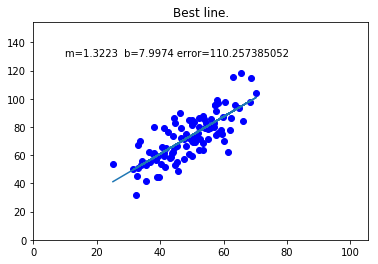

1st order optimization starts at Fri Jul  6 23:34:44 2018
Finished with learning rate 0.00021
1st order optimization ends at Fri Jul  6 23:34:44 2018 and has taken 0ms


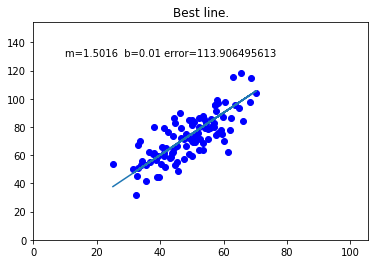

In [13]:
    print(newton_points)
    print("b = {0}, m = {1}, error = {2}".format(newton_points[1], newton_points[0], compute_total_error(newton_points[0], newton_points[1])))
    time_t = time.time() - time_t #end time
    print("2nd order optimization ends at %s and has taken %dms"%(str(time.asctime()), time_t))
    plot_line_data1(newton_points[0], newton_points[1]) #plot the line generated
    print("1st order optimization starts at "+ str(time.asctime())) #start time
    time_t = time.time()
    [m,b, error] = gd(points, init_b, init_m, learning_rate, iterations, early_stop_num = 5, modify_lr = True)
    time_t = time.time() - time_t #end time
    print("1st order optimization ends at %s and has taken %dms"%(str(time.asctime()), time_t))
    plot_line_data1(m, b) #plot the generated line